In [91]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Pattern restricted short term memory time series

Basically want to generate sequences (1d random walks) with the property that the series only has memory for certain patterns.  So a sort of short term memory time series

This inspired by conscious systems that are only affected by symbols and patterns with meaning.
- e.g. when driving down a street the surroundings (bushes, buildings) generally has low weighting on your thoughts and actions but signs, and salient locations (like your destination) do influence your actions

It's also a bit like DNA transcription 

### Ideas 

So want to create a function that creates a random walk, but once a certain sequence has been generated, do *something*  (that something is tbd)
- Find out how long it takes for sequence to satisfy output length
- That something can be the output of a new symbol
     - For now let's make it directions on a grid (to visualize patterns)
- rules should be in a dictionary of sorts if using a language
- Or can randomly generate rules:
    - For symmetric mode: given lookback window length, create a dictionary where each symmetric word of that length does something/outputs a symbol
    - Can choose how big you want dictionary (longer the window length may result in really long dicts)
    - Should figure out how many binary symmetric words are there for a given length (math question)? 
- How does behavior of output differ between randomly generated rules and preset rules?
- How to implement 'mutations'

For now salient subsequences will be those that are palindromic given a different length, and step size.  
- Would be intersting to see how behavior changes with changing lookback window length
    - E.g we know that short window length will lead to more activity ( \\(P(101) >  (P(110010011))\\)

#### Philosophically... this is trying to make order of randomness so to speak, and to see if orderly action can result from chaos.   
#### And more specifically, what rules emulate intelligent systems? (relate back to criticality)
#### In the neuroscience context, this is trying to model how random neural activity contributes to conscious thought (symbols)

### TODO Code specifics:
- Still have to implement step
- Determining the stop for the sequence generation should either be a condition on the output (e.g. meet a certain amount of actions) or on the sequence (e.g. stop at certain length)
- Appending output to current sequence ('self_affine' paramter; is this the appropriate word?) vs to a separate list
    - maybe this depends on the situation, as sometimes output affects future behavior, and sometimes it doesn't
        - E.g. your thoughts are the same time series vs offloading/writing things down (assuming it doesn't enter back your thoughts process)
    - Maybe offloading can append a transformed version of the output to the main sequence
        - Like how writing can make you think differently
    - If it appends an existing word to sequence, this will definitely affect reading the sequence
    - Very open ended in this respect, either way should   
- need a way to visualize words from the language vs random bits
- Palindromes for now but later create random words to do something
- Should running sequence, and output, be a list or string?  For now seq is str, output list
- Implement signal profile/ cumulative sum and run DFA on it

### As I expand:
- can also create a language with certain rules
    - this can create some sort of automata!
- Would be good to explore other random distributions for the random walk in generating 0, 1's
    - as well as other number bases (hex), and using letters
    - Zipfian distr
- nonlinear sequences

### Other stuff:
- incorporating LSTM neural networks

In [83]:
def backwards(s):
    """helper function to create backwards version of input"""
    if type(s) != str:
        s = str(s)
    
    tmp = ""
    for i in [-1 * elt for elt in range(len(s) +1)][1:]:
        tmp = tmp + s[i]

    return tmp 

def isPalindrome(s): #not being used right now but maybe will be useful to do random actions?
    """helper function to check if a sequence is palindromic"""
    
    return str(s) == backwards(s)

def genPalindrome(length):
    """Either should generate a single random palindrome of given length or all of them"""
    if length%2 == 0:
        pass
    
    else:
        pass
    
class MemSeq:
    def __init__(self, stop_cond, window, step = 1):
        """
        stop_cond is an array 
        if stop_cond[0] is 'length' then generation stops once sequence is stop_cond[1] long
        if stop_cond[0] is 'outputs' then generation stops once output is stop_cond[1] long (tbd)
        
        *Might also merge this with either makeRules or generate_mem_seq
        """
        self.stop_cond = stop_cond
        self.window = window
        self.step = step
        
    def makeRules(self, rules = None):
        """
        defines the language with output for salient windows
        if no rules inputted generates random ones
        """
        if rules != None:
            self.rules = rules
        else:
            pass #set randomly assigned rules
            
    def generate_mem_seq(self, self_affine = False):
        """windows can also be an array of sizes
        If self_affine, outputs are added to current sequence, affecting behavior"""
        window = self.window
        self.seq = ""
        self.outputs = []
        i = 0
        if self.stop_cond[0] == 'outputs':
            while len(self.outputs) < self.stop_cond[1]:
                self.seq = self.seq + str(random.randint(0, 1))
                if i >= window - 1: #can't lookback if there's not enough to look back to
                    curr_window = self.seq[i+1-window : i+1]
                    if curr_window in self.rules: #lookback period
                        self.outputs.append(self.rules[curr_window])
                        if self_affine:
                            self.seq = self.seq + self.rules[curr_window]
                i+=1        
        else:
            while len(self.seq) < self.stop_cond[1]:
                self.seq = self.seq + str(random.randint(0, 1))
                if i >= window - 1:
                    curr_window = self.seq[i+1-window : i+1]
                    if curr_window in self.rules: #lookback period
                        self.outputs.append(self.rules[curr_window])
                        if self_affine:
                            self.seq = self.seq + self.rules[curr_window]
                i+=1
                    
        return self.seq, self.outputs
    
    def returnRules(self):
        return self.rules

In [123]:
size = 99856
trial = MemSeq(stop_cond = ['outputs', size], window = 4)
# {'1111': 'up', '1001':'right', '0000':'down', '0110':'left'} for random (?) walk
# {'1111': 1, '1001':2, '0000':3, '0110':4} for plt.imshow colors
trial.makeRules( {'1111': 1, '1001':2, '0000':3, '0110':4} ) 
seq, out = trial.generate_mem_seq()

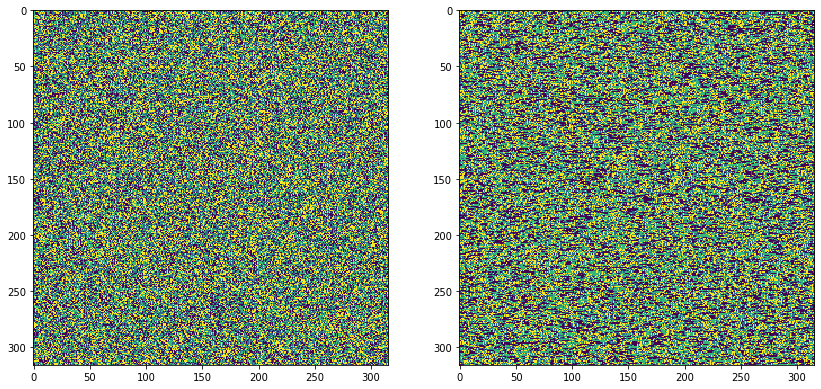

In [128]:
sq_len = 316
control = np.array([random.randint(1,4) for i in range(size)])
control = np.reshape(control,(sq_len,sq_len))

out = np.array(out)
out = np.reshape(out,(sq_len,sq_len))

plt.figure(figsize=(14,12))
plt.subplot(1,2,1)
plt.imshow(control, cmap = 'viridis')
plt.subplot(1,2,2)
plt.imshow(out, cmap = 'viridis')
#plt.colorbar(orientation = 'horizontal') #why is this messing up the scale


